In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [42]:
df = pd.read_csv('Data_to_Transform.csv')
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296


array([[<Axes: title={'center': 'Moderate Positive Skew'}>,
        <Axes: title={'center': 'Highly Positive Skew'}>],
       [<Axes: title={'center': 'Moderate Negative Skew'}>,
        <Axes: title={'center': 'Highly Negative Skew'}>]], dtype=object)

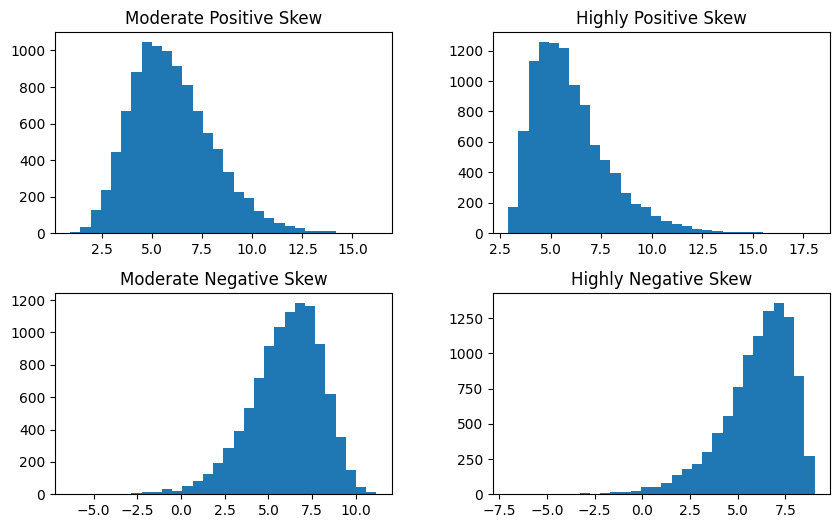

In [44]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [45]:
df.insert(len(df.columns), 'MPS_Sqrt',
         np.sqrt(df.iloc[:, 0]))

In [46]:
df.insert(len(df.columns), 'MNS_Sqrt',
         np.sqrt(max(df.iloc[:, 2]+1) - df.iloc[:, 2]))

In [47]:
df.insert(len(df.columns), 'HPS_log',
         np.log(df.iloc[:, 1]))

In [48]:
df.insert(len(df.columns), 'HNS_log',
         np.log(max(df.iloc[:, 3] + 1) - df.iloc[:, 3]))

In [49]:
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,MPS_Sqrt,MNS_Sqrt,HPS_log,HNS_log
0,0.899990,2.895074,11.180748,9.027485,0.948678,1.000000,1.063011,0.000000
1,1.113554,2.962385,10.842938,9.009762,1.055251,1.156637,1.085995,0.017568
2,1.156830,2.966378,10.817934,9.006134,1.075560,1.167396,1.087342,0.021126
3,1.264131,3.000324,10.764570,9.000125,1.124336,1.190033,1.098720,0.026992
4,1.323914,3.012109,10.753117,8.981296,1.150615,1.194835,1.102640,0.045154
...,...,...,...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,3.840449,3.893786,2.790522,2.586437
9996,14.854474,16.396252,-3.147526,-3.772332,3.854150,3.915134,2.797053,2.624655
9997,15.262103,17.102991,-3.517256,-4.717950,3.906674,3.962071,2.839253,2.690933
9998,15.269983,17.628467,-4.689833,-5.670496,3.907683,4.107381,2.869515,2.753532


array([[<Axes: title={'center': 'Moderate Positive Skew'}>,
        <Axes: title={'center': 'Highly Positive Skew'}>,
        <Axes: title={'center': 'Moderate Negative Skew'}>],
       [<Axes: title={'center': 'Highly Negative Skew'}>,
        <Axes: title={'center': 'MPS_Sqrt'}>,
        <Axes: title={'center': 'MNS_Sqrt'}>],
       [<Axes: title={'center': 'HPS_log'}>,
        <Axes: title={'center': 'HNS_log'}>, <Axes: >]], dtype=object)

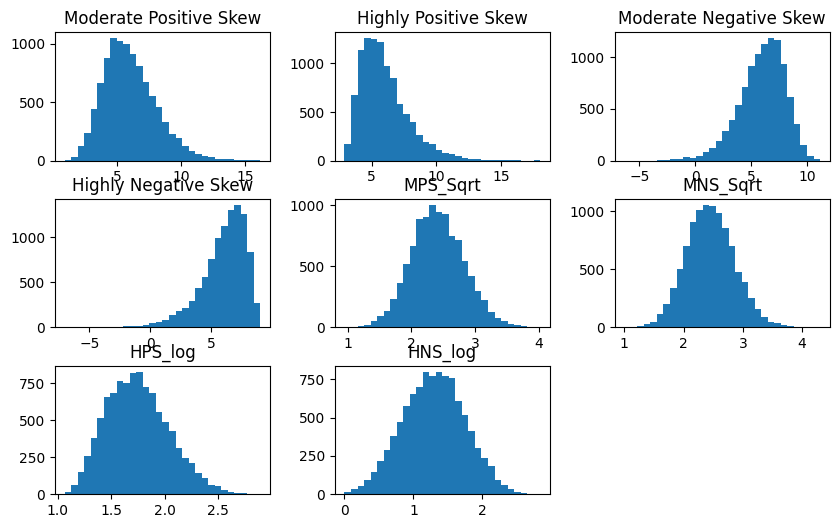

In [50]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

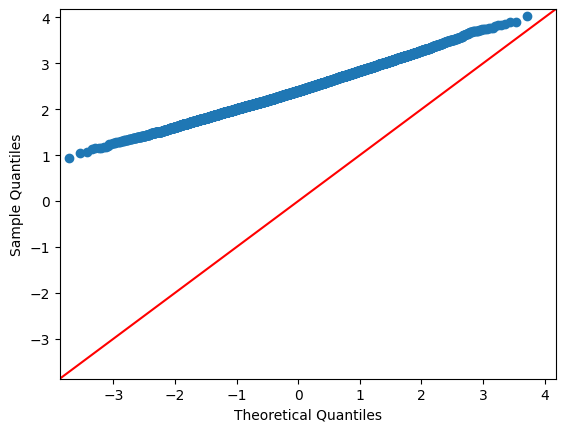

In [57]:
# MPS_SQRT
fig = sm.qqplot(df.iloc[:, 4], line='45')
plt.show()

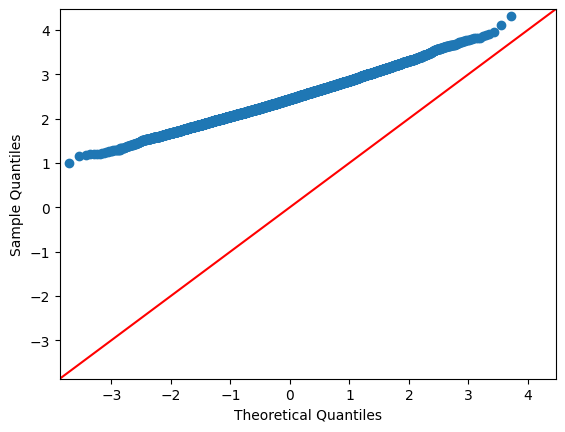

In [58]:
# MNS_SQRT
fig = sm.qqplot(df.iloc[:, 5], line='45')
plt.show()

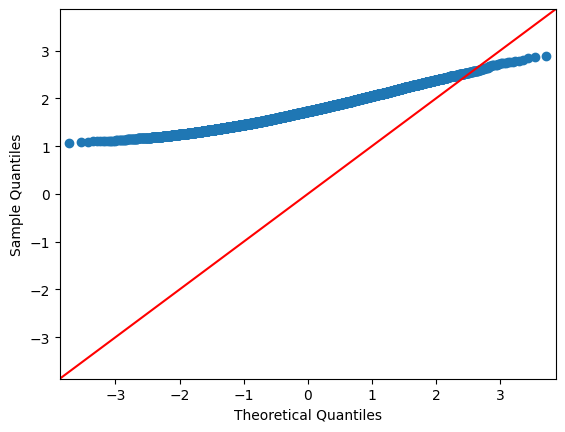

In [59]:
# HPS_LOG
fig = sm.qqplot(df.iloc[:, 6], line='45')
plt.show()

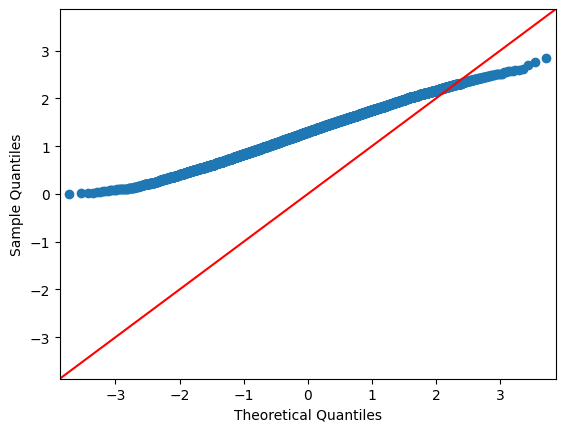

In [60]:
# HNS_LOG
fig = sm.qqplot(df.iloc[:, 7], line='45')
plt.show()

In [61]:
from sklearn.preprocessing import PowerTransformer

In [70]:
data = df.iloc[:, 1].values.reshape(-1, 1)

In [71]:
pt = PowerTransformer(method='box-cox')
df_boxcox = pt.fit_transform(data)

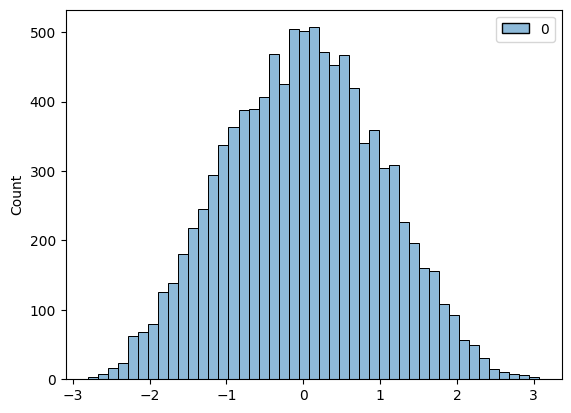

<Figure size 640x480 with 0 Axes>

In [72]:
sns.histplot(df_boxcox)
fig = plt.figure()

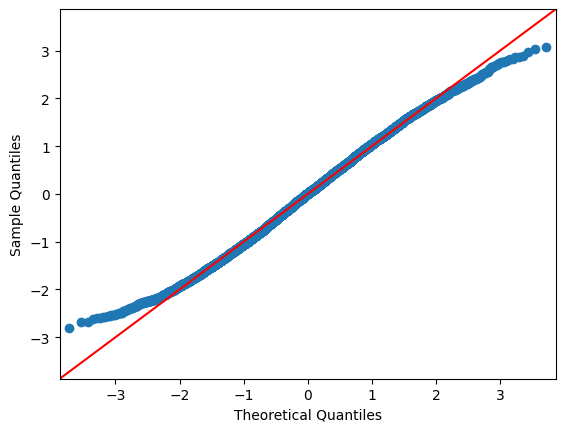

In [73]:
# перетворення Бокса-Кокса
fig = sm.qqplot(df_boxcox, line='45')
plt.show()